In [19]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
%matplotlib inline
from statsmodels.tsa.stattools import adfuller

In [6]:
df_airline = pd.read_csv("F:/timeseries/airline_passengers.csv")

In [7]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [10]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [11]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [12]:
df_airline.dropna(axis=0,inplace = True)

In [13]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [14]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [15]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [16]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [17]:
df_airline.set_index('Month', inplace=True)
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

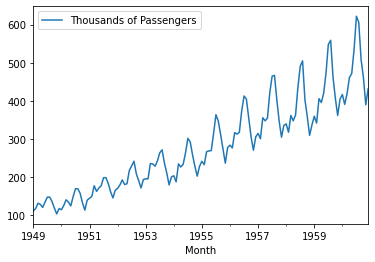

In [18]:
df_airline.plot()

In [21]:
def adf_test(series):
    result = adfuller(series)
    print("ADF statistics {}" .format(result[0]))
    print("p value {}" .format(result[1]))
    if result[1] <=0.05:
        print("reject null hypothesis")
    else:
        print("weak evidence against null hypothesis")

In [22]:
adf_test(df_airline['Thousands of Passengers'])

ADF statistics 0.8153688792060543
p value 0.9918802434376411
weak evidence against null hypothesis


In [23]:
df_airline['first diff'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(1)

In [39]:
df_airline['second diff'] = df_airline['first diff'] - df_airline['first diff'].shift(1)

In [40]:
df_airline.head()

,Thousands of Passengers,first diff,seasonal 12m diff,second diff
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,NaN,8.0
1949-04-01,129.0,-3.0,NaN,-17.0
1949-05-01,121.0,-8.0,NaN,-5.0


In [26]:
adf_test(df_airline['first diff'].dropna())

ADF statistics -2.8292668241700034
p value 0.054213290283824954
weak evidence against null hypothesis


In [27]:
df_airline['seasonal 12m diff'] = df_airline["Thousands of Passengers"] - df_airline['Thousands of Passengers'].shift(12)

In [35]:
df_airline.head()

,Thousands of Passengers,first diff,seasonal 12m diff
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,NaN
1949-04-01,129.0,-3.0,NaN
1949-05-01,121.0,-8.0,NaN


In [31]:
adf_test(df_airline['seasonal 12m diff'].dropna())

ADF statistics -3.3830207264924805
p value 0.011551493085514982
reject null hypothesis


In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

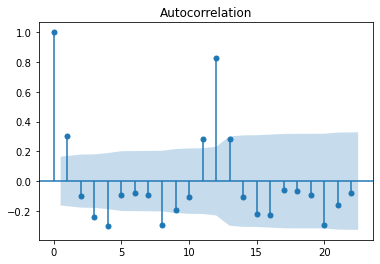

In [33]:
acf = plot_acf(df_airline['first diff'].dropna())

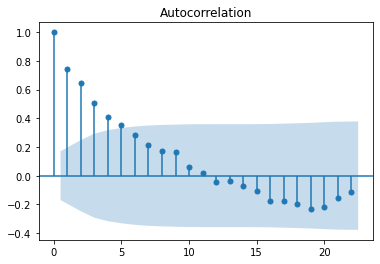

In [36]:
acf = plot_acf(df_airline['seasonal 12m diff'].dropna()) 
#q=5

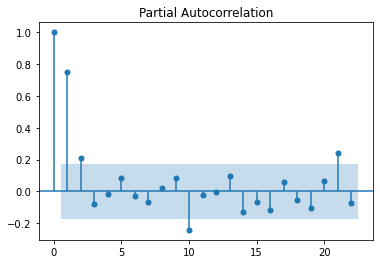

In [38]:
pacf12 = plot_pacf(df_airline['seasonal 12m diff'].dropna()) 
#p =2,10

F:\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


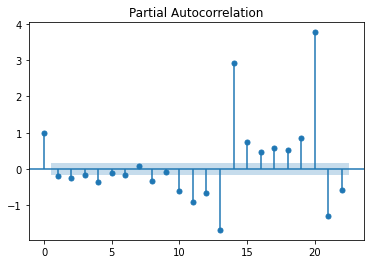

In [52]:
pacf2d = plot_pacf(df_airline['second diff'].dropna()) 


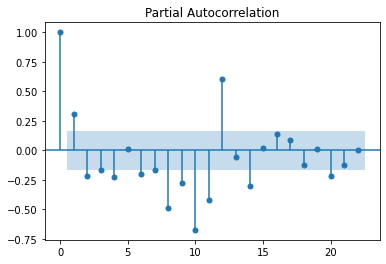

In [34]:
pacf = plot_pacf(df_airline['first diff'].dropna())

In [42]:
from datetime import datetime,timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)


In [43]:
train_data = df_airline[:train_dataset_end]
test_data = df_airline[train_dataset_end+timedelta(days=1): test_dataset_end]

In [47]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [83]:
model_sarima  = SARIMAX(train_data['Thousands of Passengers'], order=(4,0,5),seasonal_order=(0,1,0,12))

F:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
F:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [84]:
model_sarima_fit = model_sarima.fit()

F:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
F:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [85]:
model_sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(4, 0, 5)x(0, 1, [], 12)   Log Likelihood                -264.599
Date:                             Mon, 09 May 2022   AIC                            549.198
Time:                                     15:22:27   BIC                            571.964
Sample:                                 01-01-1949   HQIC                           558.261
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7447      0.774      0.962      0.336      -0.773       2.263
ar.L2         -0.5276      1.041     -0.507      0.612      -2.568       1.513
ar.L3          0.1944      1.015      0.191      0.848      -1.796       2.185
ar.L4          0.5379      0.710      0.757      0.449      -0.854       1.930
ma.L1         -0.0223      0.739     -0.030      0.976      -1.470       1.425
ma.L2          0.8185      0.537      1.523      0.128      -0.235       1.872
ma.L3          0.1246      0.913      0.136      0.891      -1.665       1.914
ma.L4         -0.0569      0.369     -0.154      0.877      -0.780       0.666
ma.L5         -0.1211      0.207     -0.585      0.558      -0.527       0.285
sigma2        80.5483     15.900      5.066      0.000      49.386     111.711
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.10
Prob(Q):                              0.90   Prob(JB):                         0.58
Heteroskedasticity (H):               2.28   Skew:                             0.30
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
pred = model_sarima_fit.predict(start = pred_start_date, end= pred_end_date)
residuals = test_data['Thousands of Passengers'] - pred

F:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:ylabel='Density'>

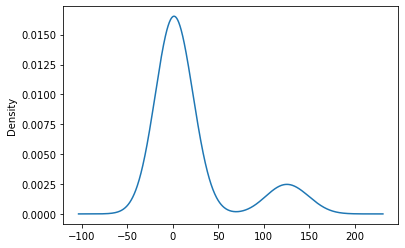

In [87]:
model_sarima_fit.resid.plot(kind='kde')

In [88]:
test_data['pred_sarima'] = pred

C:\Users\Sabarish\AppData\Local\Temp/ipykernel_12652/3789096641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['pred_sarima'] = pred


In [92]:
test_data['pred_fut'] = pred_fut

C:\Users\Sabarish\AppData\Local\Temp/ipykernel_12652/2959213115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['pred_fut'] = pred_fut


In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose

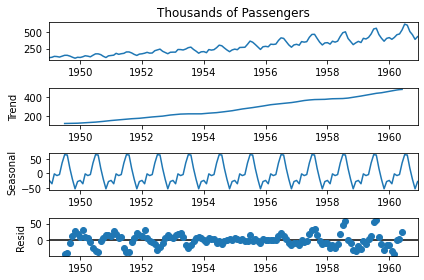

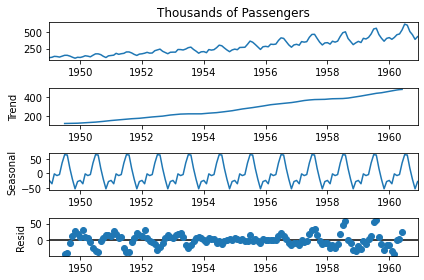

In [106]:
decompose = seasonal_decompose(df_airline['Thousands of Passengers'], model='additive')
decompose.plot()

<AxesSubplot:xlabel='Month'>

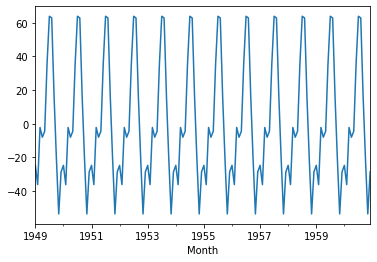

In [107]:
decompose.seasonal.plot()

In [117]:
from pandas.tseries.offsets import DateOffset

In [118]:
pred_date=[df_airline.index[-1]+ DateOffset(months=x)for x in range(0,24)]
pred_date

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00')]

In [120]:
pred_date=pd.DataFrame(index=pred_date[1:],columns=df_airline.columns)
pred_date

,Thousands of Passengers,first diff,seasonal 12m diff,second diff
1961-01-01,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN
1961-06-01,NaN,NaN,NaN,NaN
1961-07-01,NaN,NaN,NaN,NaN
1961-08-01,NaN,NaN,NaN,NaN
1961-09-01,NaN,NaN,NaN,NaN
1961-10-01,NaN,NaN,NaN,NaN


In [121]:
mergedf = pd.concat([df_airline,pred_date])
mergedf.tail()

,Thousands of Passengers,first diff,seasonal 12m diff,second diff
1962-07-01,NaN,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN,NaN
1962-11-01,NaN,NaN,NaN,NaN


In [122]:
mergedf.shape

(167, 4)

In [129]:
pred_fut = model_sarima_fit.predict(start = 143, end=167,dynamic=True)

F:\anaconda\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [130]:
mergedf['pred_fut'] = pred_fut
mergedf

,Thousands of Passengers,first diff,seasonal 12m diff,second diff,pred_fut
1949-01-01,112.0,NaN,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN,NaN
1949-03-01,132.0,14.0,NaN,8.0,NaN
1949-04-01,129.0,-3.0,NaN,-17.0,NaN
1949-05-01,121.0,-8.0,NaN,-5.0,NaN
...,...,...,...,...,...
1962-07-01,NaN,NaN,NaN,NaN,509.422549
1962-08-01,NaN,NaN,NaN,NaN,490.888491
1962-09-01,NaN,NaN,NaN,NaN,453.879131
1962-10-01,NaN,NaN,NaN,NaN,412.351894


<AxesSubplot:xlabel='Month'>

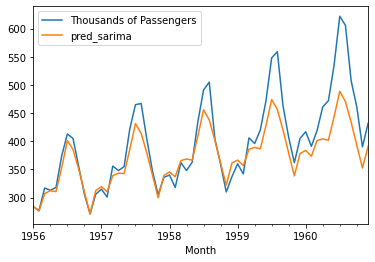

In [136]:
test_data[['Thousands of Passengers','pred_sarima']].plot()

<AxesSubplot:>

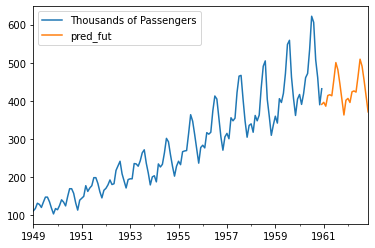

In [139]:
mergedf[['Thousands of Passengers','pred_fut']].plot()